# **1- Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **2- File path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
data_path = "/content/drive/MyDrive/For Colab/Iris.csv"

# **3- Reading data**

In [6]:
flower_dataset = pd.read_csv(data_path)

## **4- Display top 5 records**

In [7]:
flower_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **5- Checking meta information of dataframe**

## **5.1- Shape of dataframe**

In [8]:
print(f'Shape of dataframe is: {flower_dataset.shape}')

Shape of dataframe is: (150, 6)


## **5.2- Datatype of Each Column**

In [9]:
flower_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# **6- Data Cleaning**

## **6.1- Dropping unnecassary columns**

In [10]:
flower_dataset.drop("Id", axis = 1, inplace = True)

In [11]:
flower_dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## **6.2- Checking NaN values**

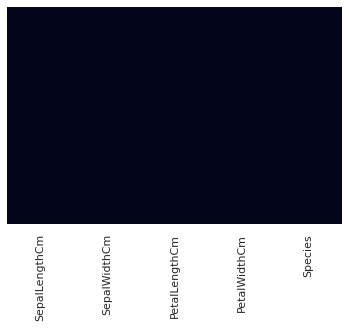

In [12]:
sns.heatmap(flower_dataset.isnull(), cbar = False, yticklabels = False);

**Fortunately data has no NaN value**

## **6.3- Checking duplicate records**

In [13]:
# Total duplicate records present in data

flower_dataset.duplicated().sum()

3

**There are 3 rows which are completely identical, So removing them from dataframe**

In [14]:
# All duplicates records which are occuring second time

flower_dataset.loc[flower_dataset.duplicated(keep='first'),:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## **6.4- Dropping duplicate records** 

In [15]:
flower_dataset.drop_duplicates(keep='first', inplace = True)

In [16]:
flower_dataset.duplicated().sum()

0

**Now all duplicate records are removed**

## **6.5- Checking statistical information of dataframe**

In [17]:
flower_dataset.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.000000,5.856463,0.829100,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,147.000000,3.055782,0.437009,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,147.000000,3.780272,1.759111,1.000000,1.600000,4.400000,5.100000,6.900000
PetalWidthCm,147.000000,1.208844,0.757874,0.100000,0.300000,1.300000,1.800000,2.500000


# **7- Visualization**

## **7.1- Visualizing Counts of Species**

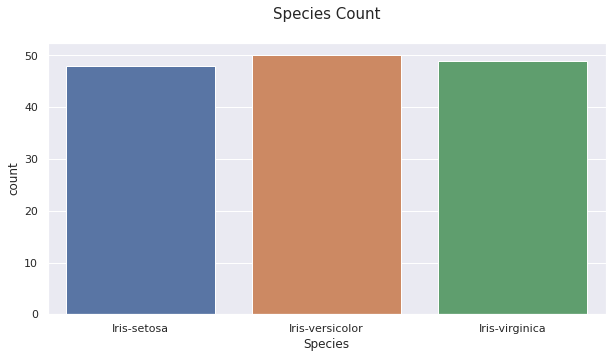

In [18]:
plt.figure(figsize=(10,5))
plt.title('Species Count\n', size = 15)

sns.countplot(flower_dataset['Species']);

## **7.2- Checking distribution of data**

In [19]:
columns = flower_dataset.columns[:4]

columns = list(columns)
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

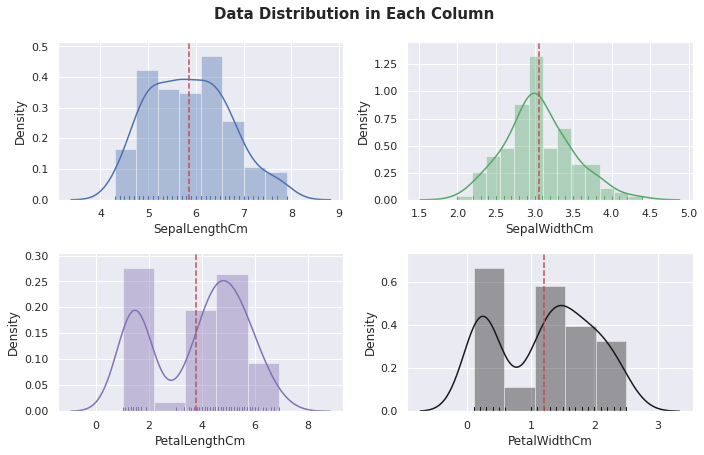

In [20]:
colors=['b','g','m','k']

sns.set(rc = {'figure.figsize':(10,6)})

for i in range(len(columns)):
  plt.subplot(2,2,i+1)
  # sns.distplot(flower_dataset)
  plt.suptitle("Data Distribution in Each Column", size = 15, y = 1.05, fontweight ="bold")
  plt.tight_layout()
  sns.distplot(flower_dataset[columns[i]], hist = True, rug = True, color = colors[i])
  plt.axvline(flower_dataset[columns[i]].mean(), linestyle = '--', color = 'r')

## **7.3- Visualizing pariplot**

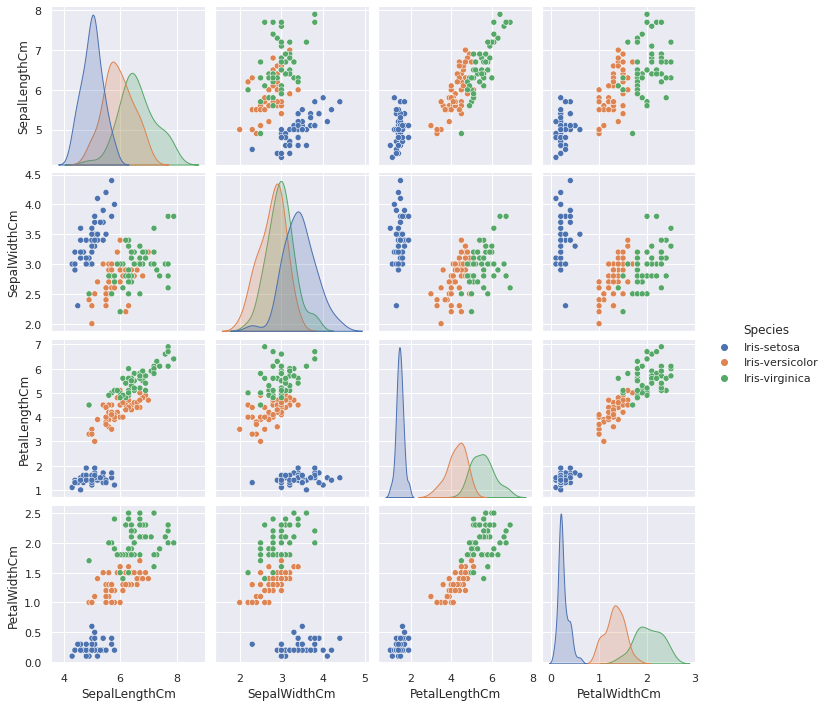

In [21]:
sns.pairplot(flower_dataset, hue='Species');

## **7.4- Pairplot Using Plotly**

In [22]:
fig = px.scatter_matrix(flower_dataset,
    dimensions=["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"],
    color="Species", symbol="Species",
    title="<b>Pairplot of Iris Data </b>",
    ) 

fig.update_traces(diagonal_visible=False)

fig.update_layout(    
    dragmode='select',
    width=1050,
    height=700,
    hovermode='closest',
)

fig.show()

## **7.5- Visualizing SepalLength and SepalWidth**

In [23]:
px.scatter(x = flower_dataset['SepalLengthCm'], y = flower_dataset['SepalWidthCm'],
           data_frame = flower_dataset,
           color = 'Species',
           title = "<b>SepalLength & SepalWidth</b>")



<h3><b>Total 3 clusters are present in Sepal</b></h3>

## **7.6- Visualizing PetalLength and PetalWidth**

In [24]:
px.scatter(x = flower_dataset['PetalLengthCm'], y = flower_dataset['PetalWidthCm'],
           data_frame = flower_dataset,
           color = 'Species',
           title = "<b>PetalLength & PetalWidth</b>")

<h3><b>So Total 3 clusters are present in Petal</b></h3>